# Feature scaling

Feature scaling is essential for machine learning algorithms that calculate distances between data. If not scale, the feature with a higher value range starts dominating when calculating distances, as explained intuitively in the “why?” sectio

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
df = pd.DataFrame({'WEIGHT': [15, 18, 12,10],
                   'PRICE': [1,3,2,5]},
                   index = ['Orange','Apple','Banana','Grape'])
df

,WEIGHT,PRICE
Orange,15,1
Apple,18,3
Banana,12,2
Grape,10,5


In [11]:
# pip install sklearn

# 1. Min Max scaler:

Transform features by scaling each feature to a given range. This estimator scales and translates each feature individually such that it is in the given range on the training set, e.g., between zero and one. This Scaler shrinks the data within the range of -1 to 1 if there are negative values. **We can set the range like [0,1] or [0,5] or [-1,1].**
This Scaler responds well if the standard deviation is small and when a distribution is **not Gaussian**. This Scaler is **sensitive to outliers**.

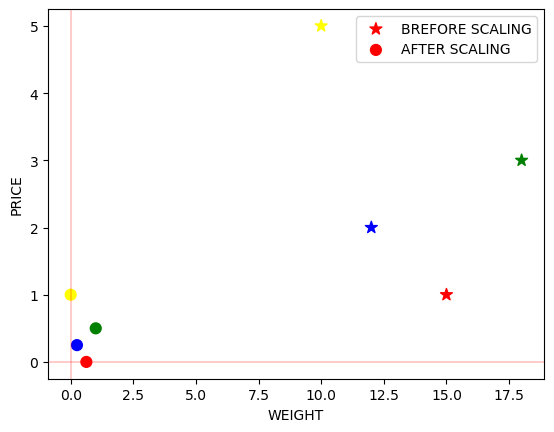

In [13]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df1 = pd.DataFrame(scaler.fit_transform(df), columns=['WEIGHT','PRICE'], index = ['Orange','Apple','Banana','Grape'])
ax = df.plot.scatter(x='WEIGHT', y='PRICE',color=['red','green','blue','yellow'], marker = '*',s=80, label='BREFORE SCALING');
df1.plot.scatter(x='WEIGHT', y='PRICE', color=['red','green','blue','yellow'], marker = 'o',s=60,label='AFTER SCALING', ax = ax);
plt.axhline(0, color='red',alpha=0.2)
plt.axvline(0, color='red',alpha=0.2);

# 2. Standard scaler

The Standard Scaler assumes data is normally distributed within each feature and scales them such that the distribution centered around 0, with a standard deviation of 1.

Centering and scaling happen independently on each feature by computing the relevant statistics on the samples in the training set. If data is not normally distributed, this is not the best Scaler to use.

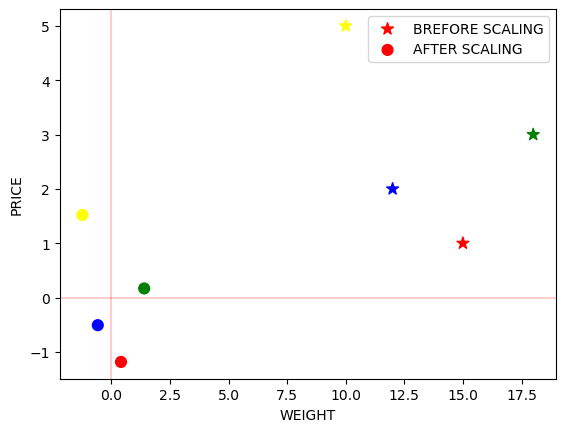

In [14]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df2 = pd.DataFrame(scaler.fit_transform(df),
                   columns=['WEIGHT','PRICE'],
                   index = ['Orange','Apple','Banana','Grape'])
ax = df.plot.scatter(x='WEIGHT', y='PRICE',color=['red','green','blue','yellow'],
                     marker = '*',s=80, label='BREFORE SCALING');
df2.plot.scatter(x='WEIGHT', y='PRICE', color=['red','green','blue','yellow'],
                 marker = 'o',s=60,label='AFTER SCALING', ax = ax)
plt.axhline(0, color='red',alpha=0.2)
plt.axvline(0, color='red',alpha=0.2);

# 3. Max Abs Scaler

Scale each feature by its maximum absolute value. This estimator scales and translates each feature individually such that the maximal absolute value of each feature in the training set is 1.0. It does not shift/center the data and thus does not destroy any **sparsity**.

On positive-only data, this Scaler behaves similarly to Min Max Scaler and, therefore, also suffers from the presence of significant **outliers**.

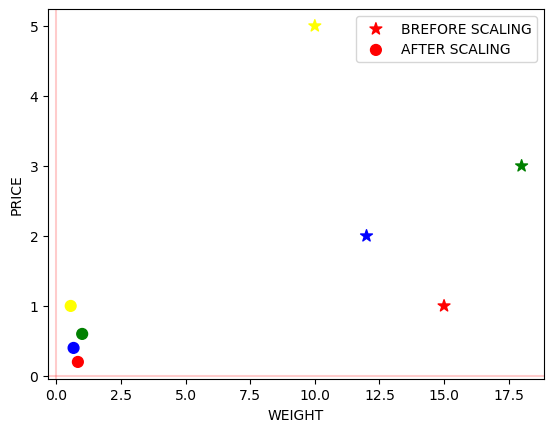

In [18]:
from sklearn.preprocessing import MaxAbsScaler
scaler = MaxAbsScaler()
df4 = pd.DataFrame(scaler.fit_transform(df),
                   columns=['WEIGHT','PRICE'],
                   index = ['Orange','Apple','Banana','Grape'])
ax = df.plot.scatter(x='WEIGHT', y='PRICE',color=['red','green','blue','yellow'],
                     marker = '*',s=80, label='BREFORE SCALING');
df4.plot.scatter(x='WEIGHT', y='PRICE', color=['red','green','blue','yellow'],
                 marker = 'o',s=60,label='AFTER SCALING', ax = ax)
plt.axhline(0, color='red',alpha=0.2)
plt.axvline(0, color='red',alpha=0.2);

# 4. Robust scaling

As the name suggests, this Scaler is **robust** to outliers. If our data contains many **outliers**, scaling using the mean and standard deviation of the data won’t work well.

This Scaler removes the median and scales the data according to the quantile range (defaults to IQR: Interquartile Range). The IQR is the range between the 1st quartile (25th quantile) and the 3rd quartile (75th quantile). The centering and scaling statistics of this Scaler are based on percentiles and are therefore not influenced by a few numbers of huge marginal outliers. Note that the outliers themselves are still present in the transformed data. If a separate outlier clipping is desirable, a non-linear transformation is required.

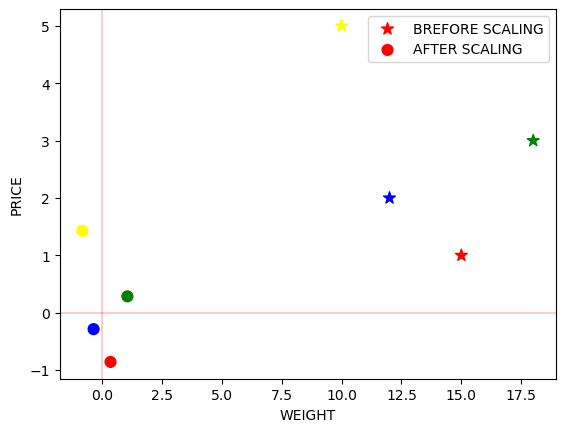

In [20]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
df3 = pd.DataFrame(scaler.fit_transform(df),
                   columns=['WEIGHT','PRICE'],
                   index = ['Orange','Apple','Banana','Grape'])
ax = df.plot.scatter(x='WEIGHT', y='PRICE',color=['red','green','blue','yellow'],
                     marker = '*',s=80, label='BREFORE SCALING');
df3.plot.scatter(x='WEIGHT', y='PRICE', color=['red','green','blue','yellow'],
                 marker = 'o',s=60,label='AFTER SCALING', ax = ax)
plt.axhline(0, color='red',alpha=0.2)
plt.axvline(0, color='red',alpha=0.2);

# 5. Quantile Transformer Scaler

Transform features using quantiles information.
This method transforms the features to follow a **uniform or a normal** distribution. 
Therefore, for a given feature, this transformation tends to spread out the most frequent values. 
It also reduces the impact of (marginal) outliers: this is, therefore, a **robust pre-processing** scheme.
The cumulative distribution function of a feature is used to project the original values. 
Note that this transform is non-linear and may distort linear correlations between variables measured at the same scale but renders variables measured at different scales more directly comparable. This is also sometimes called as **Rank scaler.**

C:\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (4). n_quantiles is set to n_samples.
  warnings.warn(


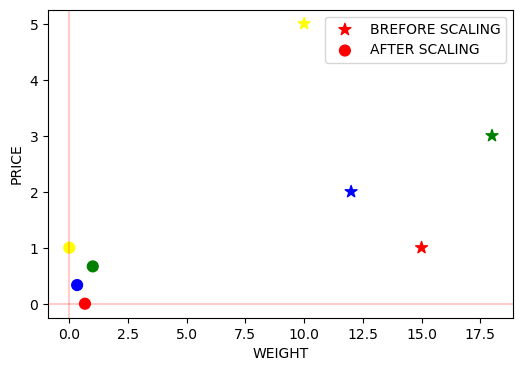

In [23]:
from sklearn.preprocessing import QuantileTransformer
scaler = QuantileTransformer()
df6 = pd.DataFrame(scaler.fit_transform(df),
                   columns=['WEIGHT','PRICE'],
                   index = ['Orange','Apple','Banana','Grape'])
ax = df.plot.scatter(x='WEIGHT', y='PRICE',color=['red','green','blue','yellow'],
                     marker = '*',s=80, label='BREFORE SCALING');
df6.plot.scatter(x='WEIGHT', y='PRICE', color=['red','green','blue','yellow'],
                 marker = 'o',s=60,label='AFTER SCALING', ax = ax,figsize=(6,4))
plt.axhline(0, color='red',alpha=0.2)
plt.axvline(0, color='red',alpha=0.2);

In [28]:
dfr = pd.DataFrame({'WEIGHT': [15, 18, 12,10,50],
                   'PRICE': [1,3,2,5,20]},
                   index = ['Orange','Apple','Banana','Grape','Jackfruit'])
print(dfr)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df21 = pd.DataFrame(scaler.fit_transform(dfr),
                   columns=['WEIGHT','PRICE'],
                   index = ['Orange','Apple','Banana','Grape','Jackfruit'])
ax = dfr.plot.scatter(x='WEIGHT', y='PRICE',color=['red','green','blue','yellow','black'],
                     marker = '*',s=80, label='BREFORE SCALING');
df21.plot.scatter(x='WEIGHT', y='PRICE', color=['red','green','blue','yellow','black'],
                 marker = 'o',s=60,label='STANDARD', ax = ax,figsize=(12,6))
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
df31 = pd.DataFrame(scaler.fit_transform(dfr),
                   columns=['WEIGHT','PRICE'],
                   index = ['Orange','Apple','Banana','Grape','Jackfruit'])df31.plot.scatter(x='WEIGHT', y='PRICE', color=['red','green','blue','yellow','black'],
                   marker = 'v',s=60,label='ROBUST', ax = ax,figsize=(12,6))
plt.axhline(0, color='red',alpha=0.2)
plt.axvline(0, color='red',alpha=0.2)

SyntaxError: invalid syntax (1497053820.py, line 18)

# 6. Power transformer scaler

The power transformer is a family of parametric, monotonic transformations that are applied to **make data more Gaussian-like**. This is useful for modeling issues related to the variability of a variable that is unequal across the range (heteroscedasticity) or situations where normality is desired.

The power transform finds the optimal scaling factor in stabilizing variance and minimizing skewness through maximum likelihood estimation. Currently, Sklearn implementation of PowerTransformer supports the Box-Cox transform and the Yeo-Johnson transform. The optimal parameter for stabilizing variance and minimizing skewness is estimated through maximum likelihood. Box-Cox requires input data to be strictly positive, while Yeo-Johnson supports both positive or negative data.

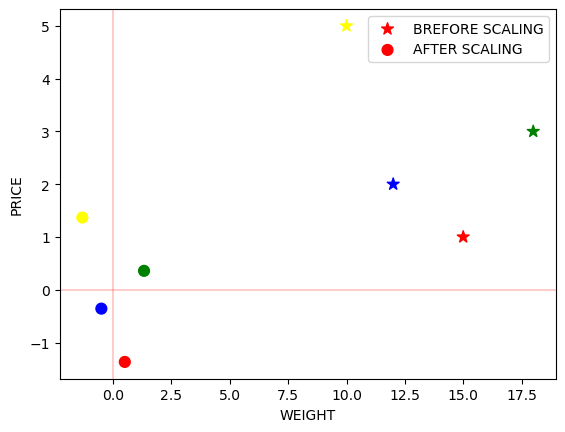

In [5]:
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')
df5 = pd.DataFrame(scaler.fit_transform(df),
                   columns=['WEIGHT','PRICE'],
                   index = ['Orange','Apple','Banana','Grape'])
ax = df.plot.scatter(x='WEIGHT', y='PRICE',color=['red','green','blue','yellow'],
                     marker = '*',s=80, label='BREFORE SCALING');
df5.plot.scatter(x='WEIGHT', y='PRICE', color=['red','green','blue','yellow'],
                 marker = 'o',s=60,label='AFTER SCALING', ax = ax)
plt.axhline(0, color='red',alpha=0.2)
plt.axvline(0, color='red',alpha=0.2);

# Unit vector scaler

Scaling is done considering the whole feature vector to be of unit length. This usually means dividing each component by the Euclidean length of the vector (L2 Norm). In some applications (e.g., histogram features), it can be more practical to use the L1 norm of the feature vector.

Like Min-Max Scaling, the Unit Vector technique produces values of range [0,1]. When dealing with features with hard boundaries, this is quite useful. For example, when dealing with image data, the colors can range from only 0 to 255.

In [29]:
# Unit vector with l1 norm
df8 = df.apply(lambda x : x/np.linalg.norm(x,1))

In [30]:
# Unit vector with l2 norm
df8 = df.apply(lambda x : x/np.linalg.norm(x,2))